In [236]:
import os
import nltk
import wordcloud
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
# nltk.download()
nltk.data.path = ['/Users/Jaylinc/Documents/Python/nltk_data']
% matplotlib inline

In [199]:
df = pd.read_json('scrapy-bs4-1000.json').drop_duplicates(subset=['desc'])
# df.location.str.split('-').str[-2].str.split(' ').str[-1].head(25)
# df.location.str.split('-').str[-1].head(25)

In [129]:
row_desc = []
for row in df.desc:
    # Tokenized the concatenation and remove punctuations
    row_tokens = nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(row)
    # Convert all characters to lower case
    row_lower = [w.lower() for w in row_tokens]
    # Remove stopwords
    row_nostops = [w for w in row_lower if w not in set(nltk.corpus.stopwords.words('english'))]
    # Stemming
    row_stem = [nltk.stem.WordNetLemmatizer().lemmatize(w) for w in row_nostops]
    row_desc.append(row_stem)

In [240]:
row_exp2 = []
for row in row_desc:
    row_3g = list(nltk.ngrams(' '.join(row).split(), 3))
    row_exp = []
    for t in row_3g:
        if (t[0] in [str(x) for x in range(20)] +\
           ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']) &\
        (t[1] in ['year', 'yr']) &\
        (t[2] == 'experience'):
            row_exp.append(t[0])
    row_exp2.append(row_exp)

In [241]:
for i, row in enumerate(row_exp2):
    for j, item in enumerate(row):
        if item == 'one':
            row_exp2[i][j] = '1'
        elif item == 'two':
            row_exp2[i][j] = '2'
        elif item == 'three':
            row_exp2[i][j] = '3'
        elif item == 'four':
            row_exp2[i][j] = '4'
        elif item == 'five':
            row_exp2[i][j] = '5'
        elif item == 'six':
            row_exp2[i][j] = '6'
        elif item == 'seven':
            row_exp2[i][j] = '7'
        elif item == 'eight':
            row_exp2[i][j] = '8'
        elif item == 'nine':
            row_exp2[i][j] = '9'
        elif item == 'ten':
            row_exp2[i][j] = '10'
        row_exp2[i][j] = int(row_exp2[i][j])
row_exp3 = [np.mean(row) if len(row) != 0 else np.nan for row in row_exp2]

In [243]:
df2 = pd.DataFrame.from_dict({'title': df.title, 
                              'company': df.company, 
                              'exp': row_exp3,
                              'desc': row_desc})
df2.head()

,title,company,exp,desc
0,Data and Visual Analytics Engineer,Pairwise,5.0,"[overview, pairwise, belief, healthy, food, af..."
1,Senior Data Scientist,Proofpoint,NaN,"[company, overview, proofpoint, passion, prote..."
2,Postdoctoral Associate in Machine Learning for...,Duke University,NaN,"[looking, postdoctoral, associate, skill, expe..."
3,Business Analyst,State of North Carolina,NaN,"[55, 000, 75, 000, yearthis, position, designa..."
4,Research and Development Engineer - Machine Le...,Kitware,NaN,"[internshipjob, description, kitware, developi..."


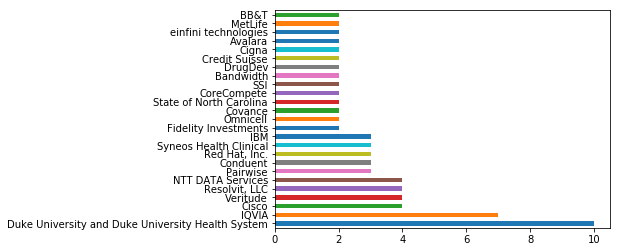

In [222]:
df.company.value_counts().nlargest(25).plot(kind='barh')

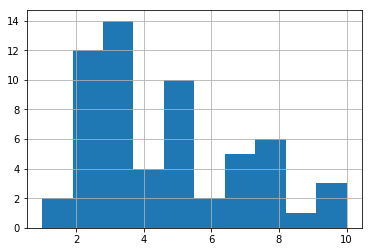

In [221]:
df2.exp.hist()

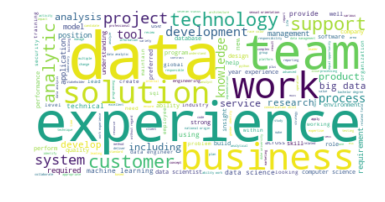

In [239]:
desc_long = ' '.join([' '.join(row) for row in df2.desc])
wc = wordcloud.WordCloud(background_color='white').generate(desc_long)
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()